# Notebook para demonstrar um exemplo de regressao linear

Este notebook apresenta um modelo simples de regressão 
linear utilizando dados de preço de moradia em boston.
É utilizado um dataset púlico ...


# Importar Bibliotecas

In [1]:
#Import Libraries

import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Carregando o datase

In [2]:
# Load dataset

boston = load_boston()

# Descrição do dataset

In [3]:
# Describe dataset


print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Carregar o dataset como um dataframe

In [4]:
import  pandas as pd

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Dividindo o dataset treinamento/teste

In [5]:
# Split training and test datasets

train_data, test_data, train_target, test_target = train_test_split(boston.data, boston.target, train_size=0.8) 

# Visualizando os dados

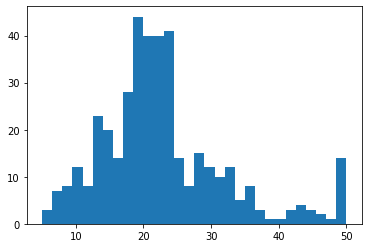

In [6]:
# Visualizar os dados

import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(train_target, bins=30)
plt.show()

# Verificando a correlação entre os dados

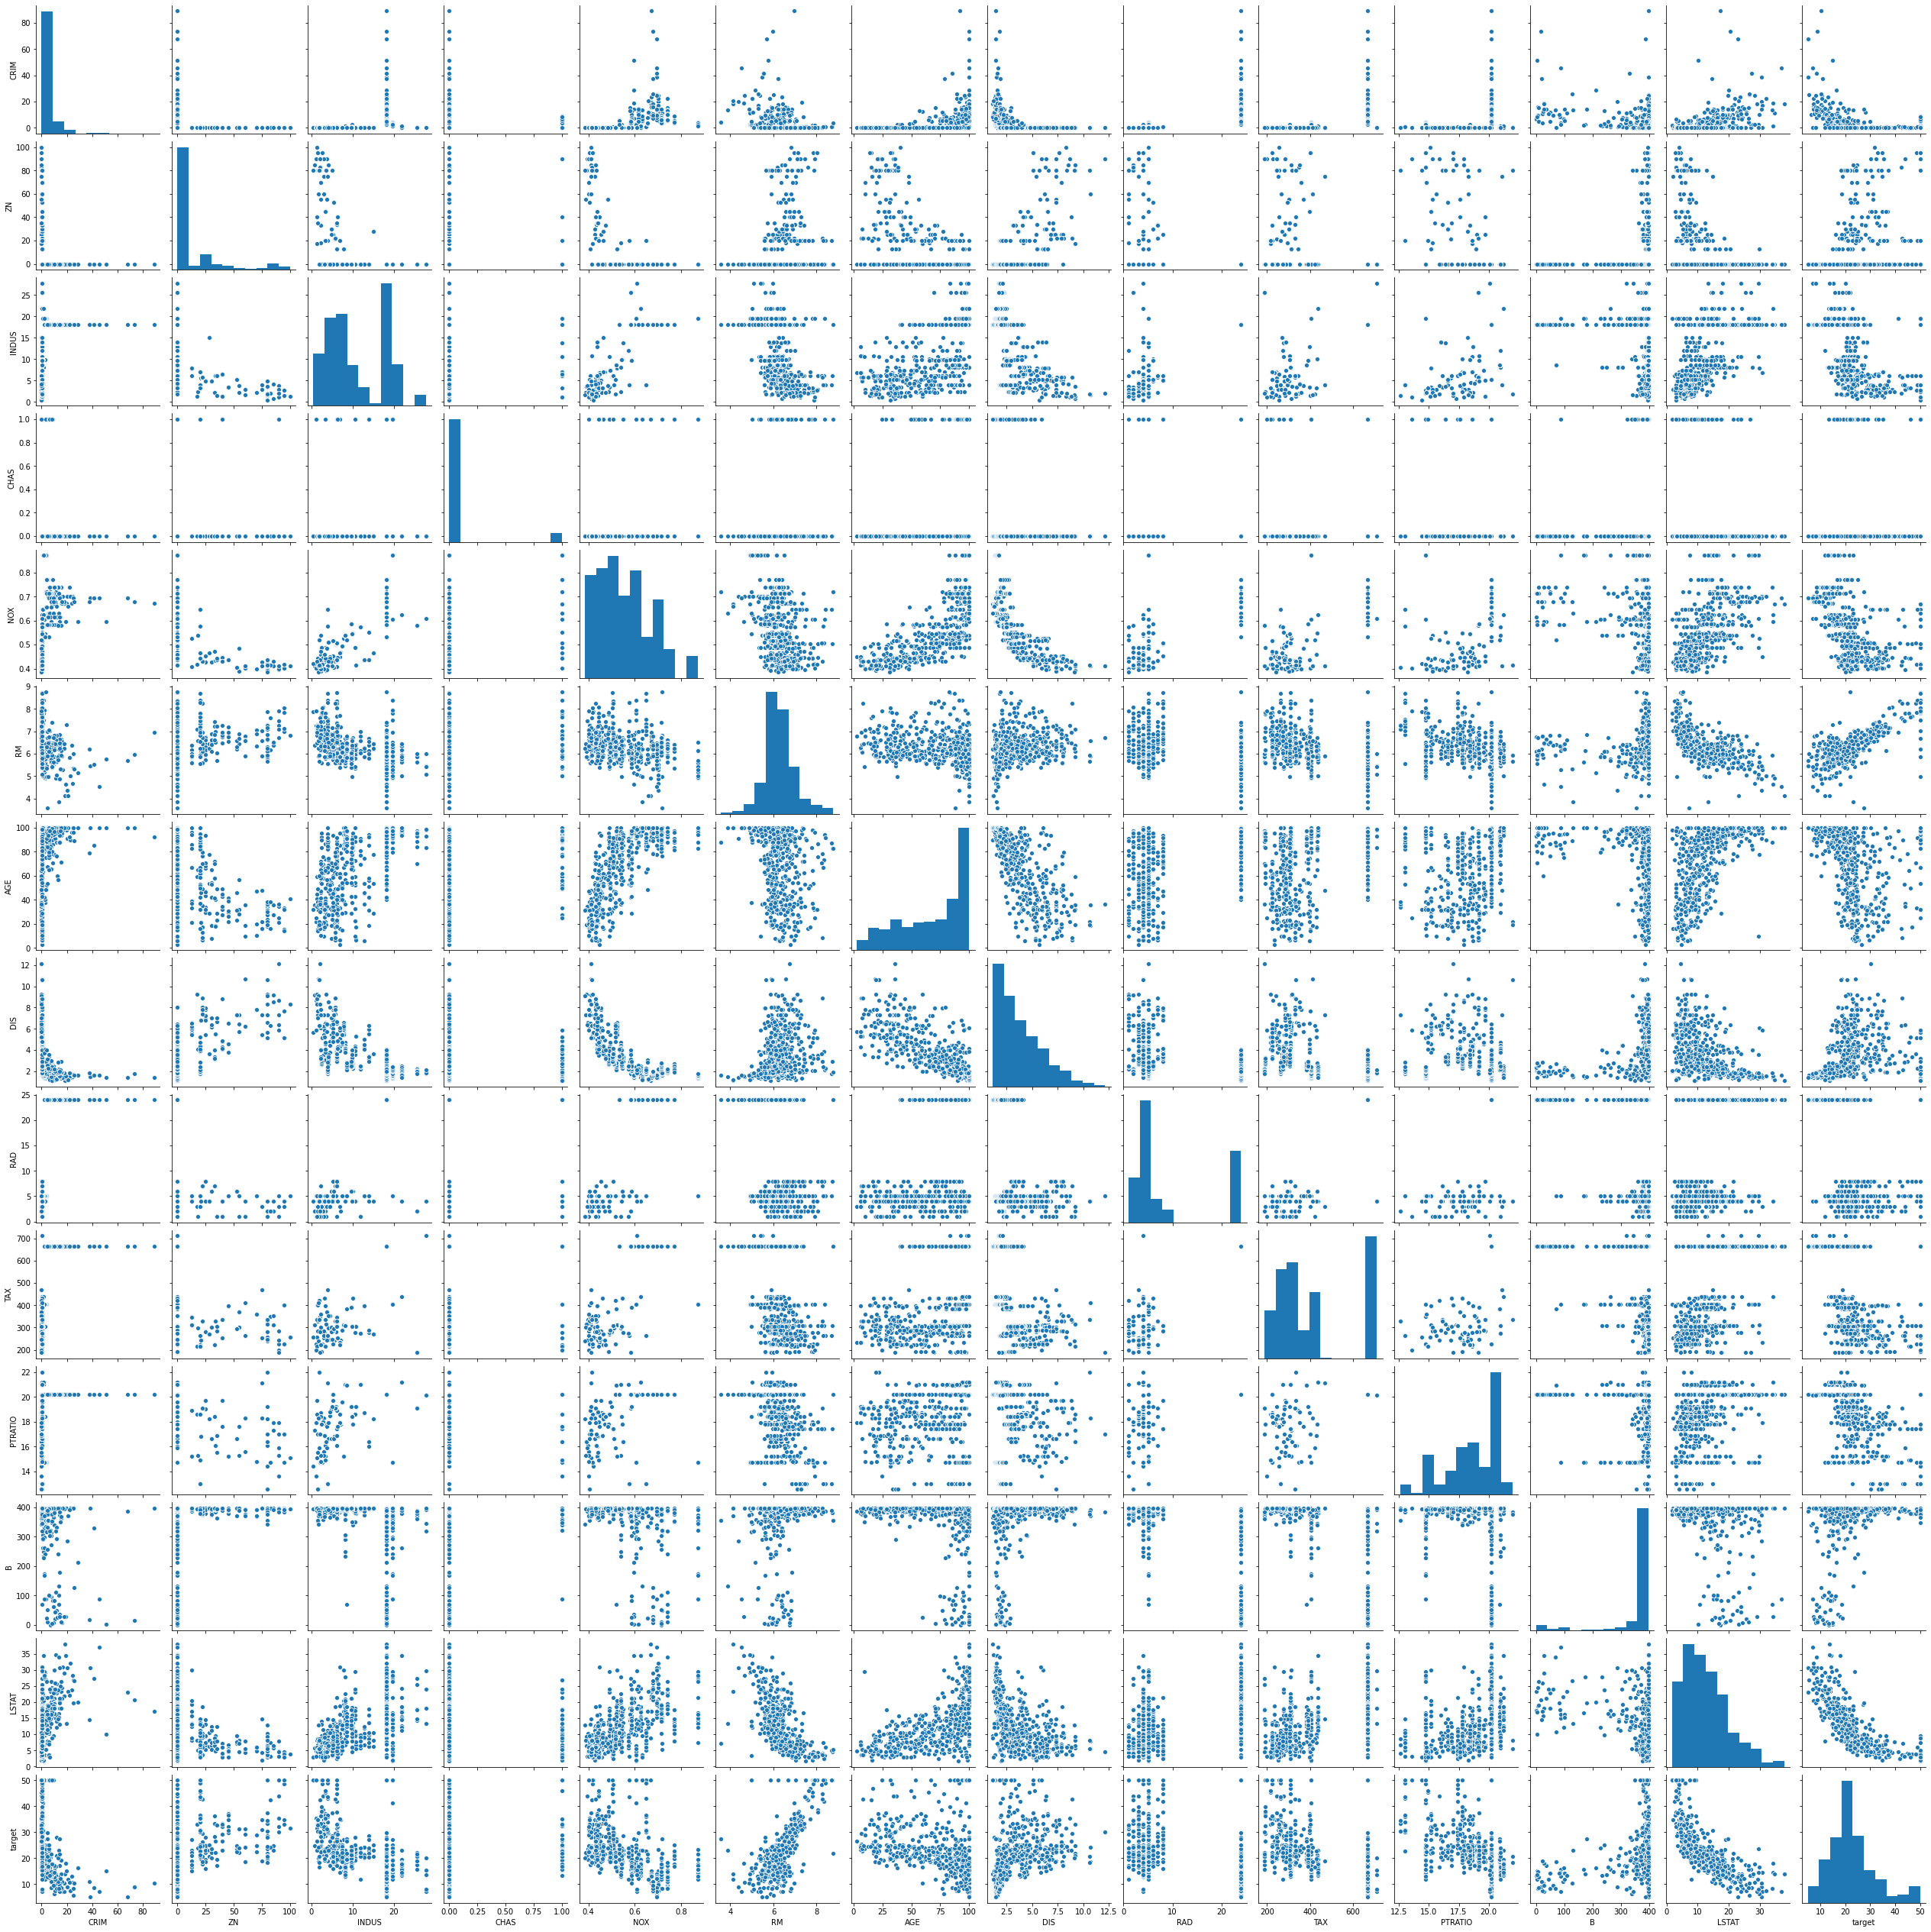

In [7]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df_boston)

Text(0, 0.5, 'Price')

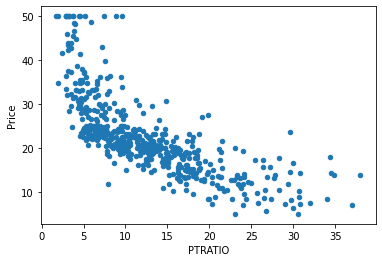

In [8]:
ax = df_boston.plot.scatter(x='LSTAT', y='target')
ax.set_xlabel('PTRATIO')
ax.set_ylabel('Price')

## Using linear regression to predict data


Let $x$ be our input and $y$ be our output.

### Linear Regression: Simple 1-D version

Our linear  regression model should be\:

\\(y = \beta x + c + \epsilon \\)

where:

* \\(\beta\\) is a constant
* $c$ is a constan
* $\epsilon$ represents the noise

### Multidimensional linear regression

\\(y = f(x_1, x_2, ..., x_n)\\) y is a function of multiple inputs variables.

So, our model should be:

\\(y = \sum_{i}^{n}{\beta_i}{x_i} + c + \epsilon\\) 

# Cria o modelo de regressão linear

In [21]:
# Crete linear regression Model

from sklearn import linear_model
linreg = linear_model.LinearRegression()

# Fita o modelo de regressão linear como o parametro número de quartos

In [22]:
# Fit model

room_index = 5
linreg.fit(train_data[:, room_index: room_index + 1], train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Realiza um conjunto de previsões

In [23]:
linreg.predict([[4], [9], [10], [11], [12], [200]])

array([   1.95806419,   47.22242571,   56.27529801,   65.32817032,
         74.38104262, 1776.32103569])

# Verifica o modelo com suas previsões

Text(0, 0.5, 'Preco')

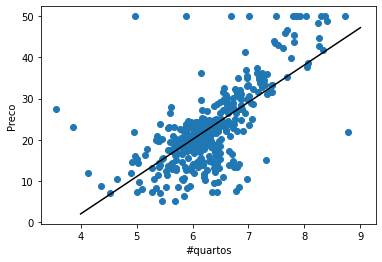

In [24]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, room_index], train_target)
ax.plot([[4], [9]], linreg.predict([[4], [9]]), 'k-')
ax.set_xlabel('#quartos')
ax.set_ylabel('Preco')

# Plota as correlações para cada gráfico

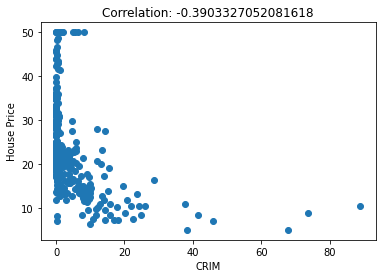

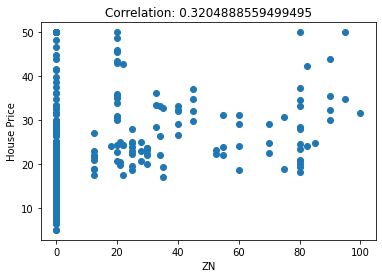

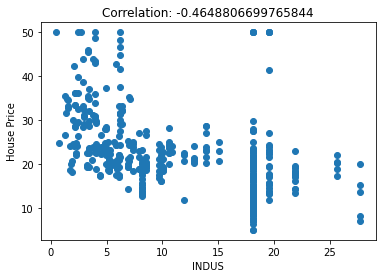

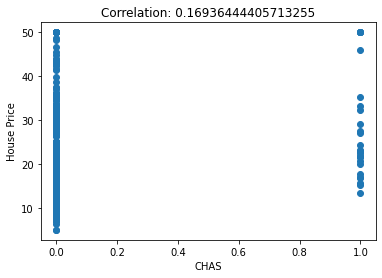

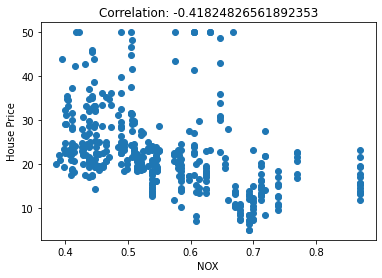

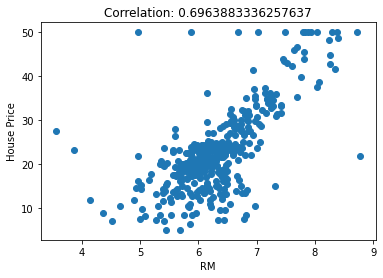

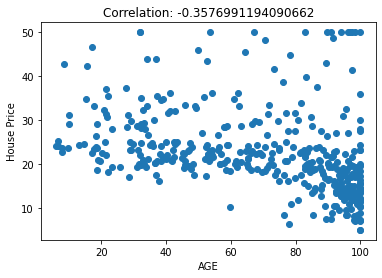

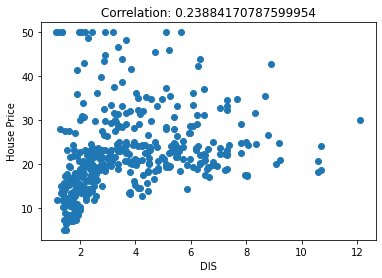

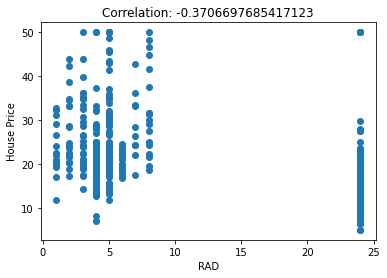

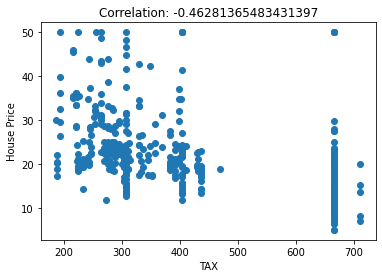

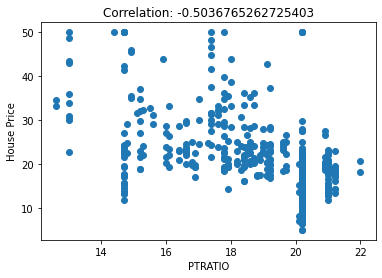

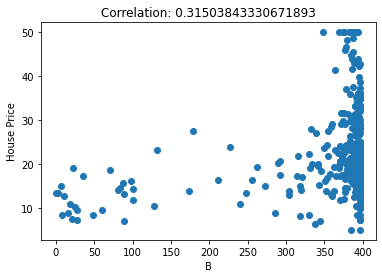

In [13]:
# Plot Scatter plot for all graphs

from scipy import stats

def plot_scatter(index):
    fig, ax = plt.subplots()
    x, y = train_data[:, index], train_target
    ax.scatter(x, y)
    ax.set_xlabel(boston.feature_names[index])
    ax.set_ylabel("House Price")
    ax.set_title("Correlation: {}".format(stats.pearsonr(x, y)[0]))
    
for i in range(0, train_data.shape[1] - 1):
    plot_scatter(i)

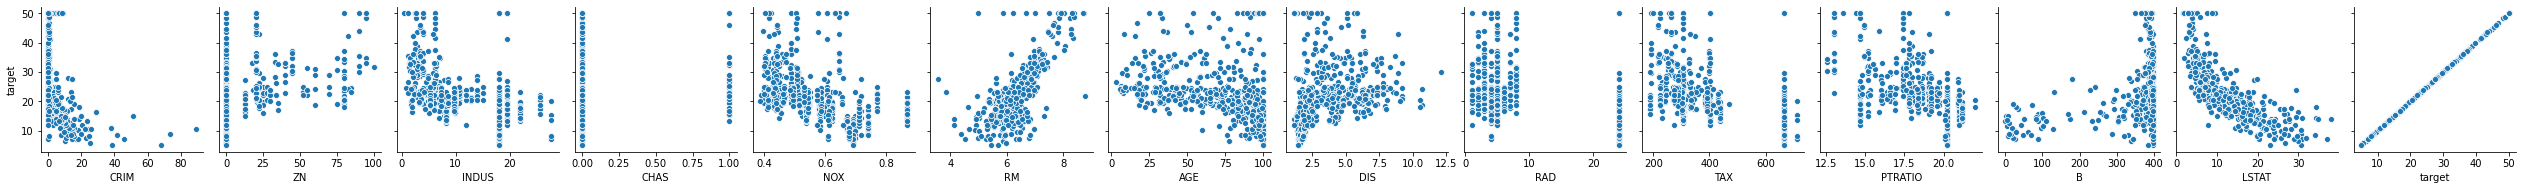

In [14]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df_boston, y_vars=['target'], x_vars=df_boston.columns)

In [15]:
# Multidimensional data

linreg.fit(train_data, train_target)
prediction = linreg.predict(test_data)

Text(0, 0.5, 'Preco Medido')

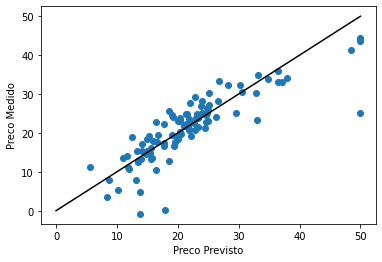

In [16]:
fig, ax = plt.subplots()
ax.scatter(test_target, linreg.predict(test_data))
ax.plot([0, 50], [0, 50], 'k-')
ax.set_xlabel('Preco Previsto')
ax.set_ylabel('Preco Medido')

In [17]:
test_target, linreg.predict(test_data)

(array([13.2,  8.7,  8.4, 23.8, 36.4, 23.9, 23.1, 18.5, 11. , 24.8, 21.1,
        14.1, 14.8, 10.2, 14. , 16.7, 21.4, 22. , 11.8, 15.4, 21.7, 18.5,
        16.5, 21.4, 21.8, 13.5, 37.9, 22.2, 26.7, 15.2, 15.6, 20.4, 23. ,
        29.6, 50. , 30.5, 22.8, 20. , 50. , 21.4, 24.7, 19.9, 14.1, 11.7,
        26.2, 25.2, 15.7, 23.4, 21.7, 23.1, 20.4, 23.3, 34.9, 20.4, 24.7,
        33.1, 15.6, 36.5, 16. , 16.5, 24. , 21.9, 13.3, 17.9, 23.4,  5.6,
        16.6, 12. , 12.5, 19.1, 32.9, 33. , 30.3, 26.6, 20.5, 19.6, 13.8,
        15. , 17.8, 13.8, 22.9, 13.4, 17.8, 21.8, 19.3, 48.5, 24.8, 25.1,
        22.6, 28.2, 19.1, 15. , 17.8, 19.2, 24.5, 25. , 25. , 20. , 50. ,
        37.2, 20.3, 21.5]),
 array([ 7.86392184,  7.93883768,  3.47385335, 26.83967915, 33.17527577,
        28.26341958, 24.86199552, 12.75013033, 13.54898842, 26.3365666 ,
        21.84577899, 17.26637722, 14.49484406,  5.35352387, 13.2624822 ,
        19.52739536, 24.78083144, 27.71229477, 11.23289284, 14.87872093,
        21.726

In [18]:
len(test_target)

102

In [19]:
# Calculate mean squared error RMSE

temp_sum = 0
for m, p in zip(test_target, linreg.predict(test_data)):
    difference = (m - p)**2
    temp_sum += difference

rmse = np.sqrt(temp_sum)/len(test_target)

print("RMSE = {}".format(rmse))

RMSE = 0.47156947868463783


In [20]:
rmse_percentual = rmse / np.mean(boston.target)
print("RMSE Percentual {}".format(rmse_percentual))

RMSE Percentual 0.02092812905332819


In [ ]:
https://bit.ly/39Bsok9